In [15]:
# Rodgers SQL Challenge - Bonus Notebook

In [16]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

# Imports the method used for connecting to DBs
from sqlalchemy import create_engine

# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float 

# Imports passcode required to access Rodgers pgadmin databases
from config import passcode

In [24]:
# Creates a connection to our DB
engine = create_engine('postgresql://postgres:'+ passcode + '@localhost:5432/aSQLChallenge')
conn = engine.connect()

In [18]:
# Preview the employee_roster data
er = pd.read_sql("SELECT * FROM employee_roster", conn)
er.head()

,empl_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [19]:
# Preview the salary data
s = pd.read_sql("SELECT * FROM salary", conn)
s.head()

,empl_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [25]:
# Merge the employee_roster and salary information
salary_roster = pd.merge(er, s, on="empl_no")
salary_roster.head()

,empl_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000


In [26]:
# Simplify and stage the salary information to place into a histogram
salary_distribution = salary_roster['salary']

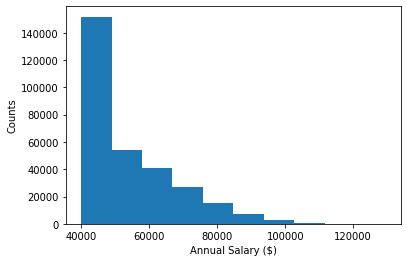

NormaltestResult(statistic=9.005890916565974, pvalue=0.0110763235943914)


In [27]:
# Characterize the data set in a histogram using matplotlib and stats.normaltest
plt.hist(salary_distribution)
plt.xlabel('Annual Salary ($)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(salary_distribution.sample(50)))

In [28]:
# Preview the title data
t = pd.read_sql("SELECT * FROM titles", conn)
t.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [31]:
#Rename title_id in order to support a class merge
tt = t.rename(columns={"title_id" : "emp_title_id"})
tt.head()

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [32]:
# Merge the salary_roster with the titles
salary_titles = pd.merge(salary_roster, tt, on="emp_title_id")
salary_titles.head()

,empl_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016,Staff


In [36]:
# Average salary by titles data frame
#iavg_df=purchasedata_df.groupby(["Item ID", "Item Name"]).mean()["Price"].rename("Average Purchase Value")
#iprofit_df = pd.DataFrame({"Purchase Count": iitem_df, "Item Price": iavg_df, "Total Purchase Value": iprice_df}).sort_values(["Total Purchase Value"], ascending=False)

a = salary_titles.groupby(["title"]).mean()["salary"].rename("Average Salary")
a = pd.DataFrame(["Title"], ["Average Salary"])
a.head()

,0
Average Salary,Title


In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Use DataFrame.plot() in order to create a bar chart of the data
organizedthree.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Number of Mice in Each Drug Regimen")

# Present the chart in desired format
#plt.tight_layout()
plt.show()

In [6]:
# Create a Session Object to Connect to DB
# ----------------------------------
# Session is a temporary binding to our DB
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [7]:
# Query All Records in the the Database
data = engine.execute("SELECT * FROM departments")

for record in data:
    print(record)

('d001', 'Marketing')
('d002', 'Finance')
('d003', 'Human Resources')
('d004', 'Production')
('d005', 'Development')
('d006', 'Quality Management')
('d007', 'Sales')
('d008', 'Research')
('d009', 'Customer Service')


In [20]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM departments", conn)

In [21]:
# Preview the Data
data.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
